In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import torch
#import torchvision

from bs4 import BeautifulSoup
from PIL import Image
import matplotlib.patches as patches
# provides a class with the same name which is used to represent a PIL image.
# Also provides a number of factory functions, including functions to load images from files,
# and to create new images.

# from IPython.display import display  # Public API for display tools in IPython.

# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../src/data/')
import make_dataset as md
#from src.data.make_dateset import flip_image

sys.path.insert(1, '../src/visualization/')
import visualize as vi

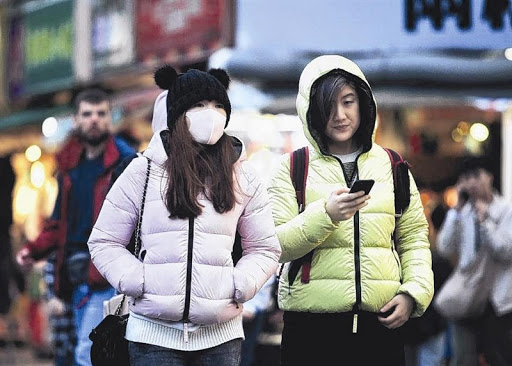

In [2]:
img_path = '../data/raw/kaggle/images/maksssksksss0.png'
#ann_path = '../data/raw/kaggle/images/maksssksksss0.xml'
# display(Image.open(path))
image_1 = Image.open(img_path)  # Used to see saved images
#Image.open(ann_path)
image_1

In [3]:
imgs = list(sorted(os.listdir("../data/raw/kaggle/images/")))
labels = list(sorted(os.listdir("../data/raw/kaggle/annotations/")))

In [4]:
labels[0]

'.ipynb_checkpoints'

In [5]:
labels[1]

'maksssksksss0.xml'

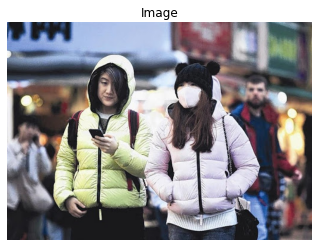

In [6]:
image_1_flipped = md.flip_image(image_1)
vi.show_image(image_1_flipped)

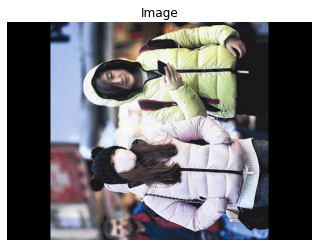

In [7]:
image_1_rotated = md.rotate_image(image_1)
vi.show_image(image_1_rotated)

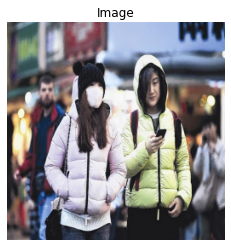

In [8]:
image_1_resized = md.resize_image(image_1, 256, 256)
vi.show_image(image_1_resized)

In [9]:
image_1_contours = md.find_contours(image_1)
#vi.show_image(image_1_contours)

In [11]:
# Create list with the shape of each contour 
shape_contours = [cnt.shape[0] for cnt in image_1_contours]

In [12]:
#shape_contours

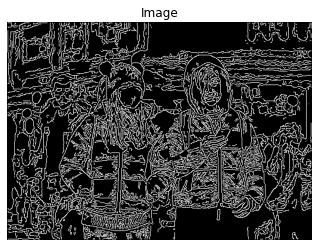

In [13]:
image_1_edges = md.find_edges(image_1)
vi.show_image(image_1_edges)

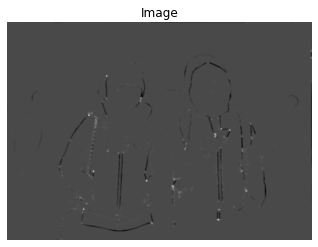

In [14]:
image_1_corners = md.find_corners(image_1)
vi.show_image(image_1_corners)

### Functions that will be usefull in the future but arent right now

#### Getting data from xml file

In [ ]:
def gen_box(obj):
    """Getting bounding box coordinates"""
    
    xmin = int(obj.find('xmin').text)
    xmax = int(obj.find('xmax').text)
    ymin = int(obj.find('ymin').text)
    ymax = int(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]

In [1]:
def gen_label(obj):
    """Generates labels for picture objects"""
    
    if obj.find('name').text == "with_mask":
        return "mask" #     for without_mask label set to 2
    elif obj.find('name').text == "mask_weared_incorrect":
        return "incorrect_mask"     # for mask_weared_incorrect label set to a

    return "no_mask" #     for without_mask label set to 0

In [ ]:
# mapping for predictions and analysis purpose
options={"no_mask": 0, "incorrect_mask": 1, "mask": 2}